In [105]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [ ]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.theta_0 = 0
        self.theta_1 = 0
        self.sse_history = []
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n = len(X)
        
        for i in range(self.n_iters):
            y_pred = self.theta_0 + self.theta_1 * X
            
            sse = np.sum((y_pred - y) ** 2)
            self.sse_history.append(sse)
            
            grad_theta0 = (2/n) * np.sum(y_pred - y)
            grad_theta1 = (2/n) * np.sum((y_pred - y) * X)
            
            self.theta_0 -= self.lr * grad_theta0
            self.theta_1 -= self.lr * grad_theta1
        
        return self
    
    def predict(self, X):
        return self.theta_0 + self.theta_1 * np.array(X)
    
    def plot_training(self):
        plt.figure(figsize=(12, 4))
        
        plt.subplot(1, 2, 1)
        plt.plot(self.sse_history)
        plt.xlabel('Iterations')
        plt.ylabel('SSE')
        plt.title('SSE over Iterations')
        plt.grid(True, alpha=0.3)
        
        plt.subplot(1, 2, 2)
        X_range = np.linspace(min(X), max(X), 100)
        y_range = self.predict(X_range)
        plt.scatter(X, y, color='blue', label='Data')
        plt.plot(X_range, y_range, 'r-', label=f'y = {self.theta_1:.2f}x + {self.theta_0:.2f}')
        plt.xlabel('House Size (m²)')
        plt.ylabel('Price (thousands)')
        plt.title('Linear Regression Fit')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

# Task Requirements

### Load & Understand the Data

In [112]:
X = np.array([50, 60, 70, 80, 90])
y = np.array([150, 180, 210, 240, 270])

print(f"X (house size in m²): {X}")
print(f"y (house price in $k): {y}")

X (house size in m²): [50 60 70 80 90]
y (house price in $k): [150 180 210 240 270]


### Create and Train the Model

In [143]:
model = LinearRegressionGD(learning_rate=0.0001, n_iters=1000)
model.fit(X, y)

print(f"\ntheta_0 (intercept): Base price = ${model.theta_0:.4f}k")
print(f"theta_1 (slope): Price per m² = ${model.theta_1:.4f}k")


theta_0 (intercept): Base price = $0.0408k
theta_1 (slope): Price per m² = $2.9994k


### Prediction

In [120]:
house_size = 70
prediction = model.predict([house_size])[0]
print(f"House size: {house_size} m²")
print(f"Predicted price: ${prediction:.2f}k")

House size: 70 m²
Predicted price: $210.00k


### Visualization

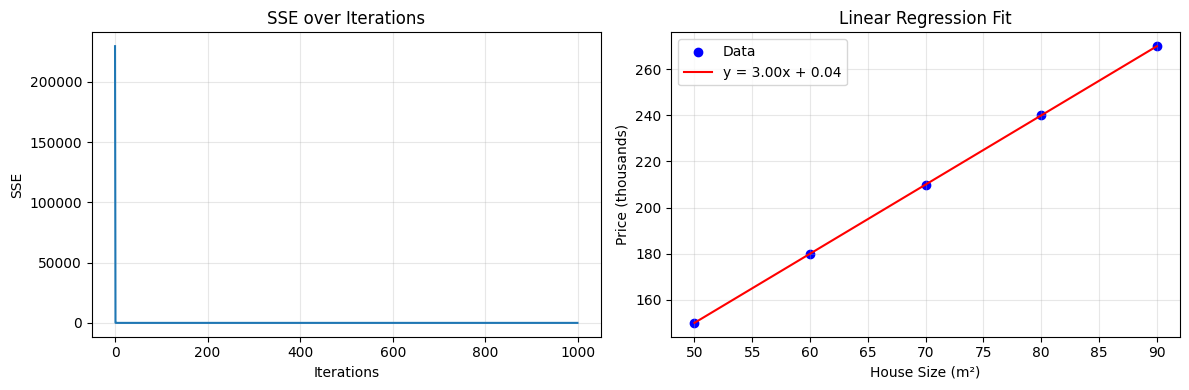

In [123]:
model.plot_training()

### Experimentation

In [140]:
learning_rates = [0.00001, 0.001, 0.1]
results = []

for lr in learning_rates:
    model_exp = LinearRegressionGD(learning_rate=lr, n_iters=100)
    model_exp.fit(X, y)
    final_sse = model_exp.sse_history[-1]
    results.append(final_sse)
    print(f"LR = {lr} → Final SSE = {final_sse:.4f}")

LR = 1e-05 → Final SSE = 0.0005
LR = 0.001 → Final SSE = 16170789775172398755595238908066781746501483154601364687047344925046310059338778686039147161006092072750161094011290684028412573385239072924446232158666424000849806708860602237814307225288514207744.0000
LR = 0.1 → Final SSE = inf


## Bonus Tasks

### MSE

In [137]:
def calculate_mse(model, X, y):
    y_pred = model.predict(X)
    return np.mean((y_pred - y) ** 2)

In [139]:
mse = calculate_mse(model, X, y)
print(f"MSE on training data: {mse:.4f}")

MSE on training data: 0.0001


### Normalize X before training

In [ ]:
X_normalized = (X - np.mean(X)) / np.std(X)
model_norm = LinearRegressionGD(learning_rate=0.1, n_iters=100)
model_norm.fit(X_normalized, y)
print(f"With normalized X:")
print(f"theta_0={model_norm.theta_0:.2f}, theta_1={model_norm.theta_1:.2f}")


   With normalized X:
   theta_0=210.00, theta_1=42.43
